# Importing Libraries


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Prepare the Data

> Divide the data in train and test

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

> Obtain the class number

In [ ]:
num_classes = np.unique(y_train)
num_classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

> Normalize the Data

In [ ]:
X_train, X_test = X_train/255, X_test/255

> Change to One-Hot Encoding

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

> Get the class number

In [ ]:
num_classes = y_train.shape[1]

# Build the Architecture

> VGG-16 Architecture

In [ ]:
class VGG16(Model):
  def __init__(self, num_classes):
    super(VGG16, self).__init__()
    self.conv1 = Conv2D(64, kernel_size=(3,3), padding='same', activation='relu')
    self.conv2 = Conv2D(64, kernel_size=(3,3), padding='same', activation='relu')
    self.max_pool1 = MaxPooling2D(pool_size=(2,2), strides=(2,2))

    self.conv3 = Conv2D(128, kernel_size=(3,3), padding='same', activation='relu')
    self.conv4 = Conv2D(128, kernel_size=(3,3), padding='same', activation='relu')
    self.max_pool2 = MaxPooling2D(pool_size=(2,2), strides=(2,2))

    self.conv5 = Conv2D(256, kernel_size=(3,3), padding='same', activation='relu')
    self.conv6 = Conv2D(256, kernel_size=(3,3), padding='same', activation='relu')
    self.conv7 = Conv2D(256, kernel_size=(3,3), padding='same', activation='relu')
    self.max_pool3 = MaxPooling2D(pool_size=(2,2), strides=(2,2))

    self.conv8 = Conv2D(512, kernel_size=(3,3), padding='same', activation='relu')
    self.conv9 = Conv2D(512, kernel_size=(3,3), padding='same', activation='relu')
    self.conv10 = Conv2D(512, kernel_size=(3,3), padding='same', activation='relu')
    self.max_pool4 = MaxPooling2D(pool_size=(2,2), strides=(2,2))

    self.conv11 = Conv2D(512, kernel_size=(3,3), padding='same', activation='relu')
    self.conv12 = Conv2D(512, kernel_size=(3,3), padding='same', activation='relu')
    self.conv13 = Conv2D(512, kernel_size=(3,3), padding='same', activation='relu')
    self.max_pool5 = MaxPooling2D(pool_size=(2,2), strides=(2,2))

    self.flatten = Flatten()
    self.dense1 = Dense(4096, activation='relu')
    self.dropout1 = Dropout(0.5)
    self.dense2 = Dense(4096, activation='relu')
    self.dropout2 = Dropout(0.5)
    self.dense3 = Dense(num_classes, activation='relu')

  def call(self, x):
    x = self.max_pool1(self.conv2(self.conv1(x)))
    x = self.max_pool2(self.conv4(self.conv3(x)))
    x = self.max_pool3(self.conv7(self.conv6(self.conv5(x))))
    x = self.max_pool4(self.conv10(self.conv9(self.conv8(x))))
    x = self.max_pool5(self.conv13(self.conv12(self.conv11(x))))
    x = self.flatten(x)
    x = self.dense3(self.dropout2(self.dense2(self.dropout1(self.dense1(x)))))
    return x

# Train the Model

> Define optimizer, loss, metric

In [ ]:
model = VGG16(num_classes)
model.build(X_train.shape)
sgd = SGD(momentum=0.9)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "vg_g16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  1792      
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  73856     
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_4 (Conv2D)            multiple                  29516

> Define the callbacks

In [ ]:
callback = [
            EarlyStopping(patience = 10, verbose = 1),
            ReduceLROnPlateau(factor = 0.1, patience = 3, min_lr = 0.00001, verbose = 1)
]

> train the model

In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size=256, validation_data=(X_test, y_test), callbacks=callback)

Epoch 1/100
196/196 [==============================] - 21s 108ms/step - loss: 2.3738 - accuracy: 0.0982 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 2/100
196/196 [==============================] - 20s 101ms/step - loss: 2.3045 - accuracy: 0.0976 - val_loss: 2.3029 - val_accuracy: 0.0723
Epoch 3/100
196/196 [==============================] - 19s 99ms/step - loss: 2.3041 - accuracy: 0.1004 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/100
196/196 [==============================] - 19s 99ms/step - loss: 2.3042 - accuracy: 0.1004 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 5/100
196/196 [==============================] - 20s 100ms/step - loss: 2.3046 - accuracy: 0.0972 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 6/100
195/196 [============================>.] - ETA: 0s - loss: 2.3037 - accuracy: 0.0996
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
196/196 [==============================] - 20s 100ms/step - loss: 2.3037 - accuracy: 0.0997 - v

# Evaluate the Model

> Calculate the acciracy in test set

In [ ]:
scores = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 2.3027 - accuracy: 0.1000


# Predict the Classes

> Set the probabilities

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[23066.992, 23392.27 , 23494.871, ..., 23536.541, 23579.93 ,
        23667.043],
       [30373.018, 30838.402, 30987.318, ..., 31052.543, 31114.023,
        31228.799],
       [27044.658, 27446.17 , 27573.707, ..., 27628.254, 27681.494,
        27783.65 ],
       ...,
       [18505.197, 18742.268, 18816.035, ..., 18843.166, 18875.148,
        18943.982],
       [25583.26 , 25956.502, 26075.875, ..., 26125.5  , 26175.074,
        26271.32 ],
       [21847.334, 22148.756, 22243.158, ..., 22281.08 , 22321.422,
        22403.531]], dtype=float32)

> Change y to original values

In [ ]:
y_test = np.argmax(y_test, axis = 1)
y_pred = np.argmax(y_pred, axis = 1)
print(y_test, y_pred)

[3 8 8 ... 5 1 7] [9 9 9 ... 9 9 9]


Calculate precision, recall, f1 score

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.10      1.00      0.18      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generate Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[   0    0    0    0    0    0    0    0    0 1000]
 [   0    0    0    0    0    0    0    0    0 1000]
 [   0    0    0    0    0    0    0    0    0 1000]
 [   0    0    0    0    0    0    0    0    0 1000]
 [   0    0    0    0    0    0    0    0    0 1000]
 [   0    0    0    0    0    0    0    0    0 1000]
 [   0    0    0    0    0    0    0    0    0 1000]
 [   0    0    0    0    0    0    0    0    0 1000]
 [   0    0    0    0    0    0    0    0    0 1000]
 [   0    0    0    0    0    0    0    0    0 1000]]


Show Confusion Matrix with Seaborn

Text(87.0, 0.5, 'True')

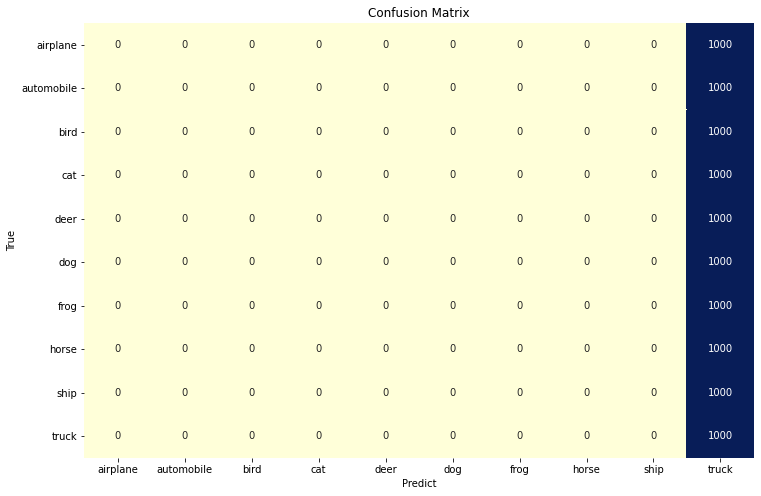

In [ ]:
labels = ['airplane',
          'automobile',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck',
          ]

plt.subplots( figsize = ( 12, 8 ) )
sns.heatmap( cm, cmap = 'YlGnBu', annot = True, fmt = 'd', cbar = False, xticklabels = labels, yticklabels = labels )
plt.title( 'Confusion Matrix' ) 
plt.xlabel( 'Predict' )
plt.ylabel( 'True' )